<a href="https://colab.research.google.com/github/j96k/-j96k-WEB_SCRAPING_MULTIPLE_URLs/blob/main/House_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

In this analysis, we delve into the dynamics between the S&P/Case-Shiller U.S. National Home Price Index and the Gross Domestic Product (GDP) over the past two decades. The data, sourced from the Federal Reserve Economic Data (FRED) platform, specifically focuses on the "S&P/Case-Shiller U.S. National Home Price Index" and "Gross Domestic Product" tables, both provided in monthly and quarterly formats, respectively.

# **Data Sources:**



1.   **S&P/Case-Shiller U.S. National Home Price Index:**   
     Description: Index Jan 2000=100, Monthly, Seasonally Adjusted.
     Source: FRED Graph Observations - Home Price Index

2.   **Gross Domestic Product:**

     Description: Billions of Dollars, Quarterly, Seasonally Adjusted Annual Rate.
     Source: FRED Graph Observations - GDP

# **Methodology:**
Our analysis adopts a holistic approach, beginning with the importation of essential libraries, extracting data from the FRED platform, and applying Exploratory Data Analysis (EDA). We utilize visualizations to unveil patterns and trends inherent in the datasets. Furthermore, we construct a predictive model, leveraging the observed relationship with GDP to forecast home prices for the next decade.

# **Import Libraries:**

In [ ]:
# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualizatio import seaborn as sns # visualization library for statistical graphics plotting
import matplotlib.pyplot as plt #  low level graph plotting

import os # interacting with the operating system

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score


# **Read Excel Files:**

In [ ]:
# import in annotationsg price_index data
price_index = pd.read_excel('/content/drive/MyDrive/Home.LLC/main-dataset/CSUSHPISA_Home_Price_Index_Seasonally Adjusted.xls')

# First 5 rows of price_index data
price_index.head(100)


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
95,1994-02-01 00:00:00,78.727
96,1994-03-01 00:00:00,78.856
97,1994-04-01 00:00:00,78.988
98,1994-05-01 00:00:00,79.222


In [ ]:
# importinannotationsg training data
gdp_data = pd.read_excel('/content/drive/MyDrive/Home.LLC/main-dataset/GDP.xls')

# First 5 rows of training data
gdp_data.head(100)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
95,1968-04-01 00:00:00,934.344
96,1968-07-01 00:00:00,950.825
97,1968-10-01 00:00:00,968.03
98,1969-01-01 00:00:00,993.337


 **Remove Unnecessary Rows:**
 Clean the data by removing unnecessary rows that may not contribute to the analysis.

In [ ]:
# Remove the first 10 rows
price_index = price_index.iloc[10:]

price_index

,FRED Graph Observations,Unnamed: 1
10,1987-01-01 00:00:00,63.965
11,1987-02-01 00:00:00,64.424
12,1987-03-01 00:00:00,64.736
13,1987-04-01 00:00:00,65.132
14,1987-05-01 00:00:00,65.563
...,...,...
445,2023-04-01 00:00:00,300.198
446,2023-05-01 00:00:00,302.62
447,2023-06-01 00:00:00,304.651
448,2023-07-01 00:00:00,306.634


In [ ]:
# Remove the first 10 rows
gdp_data = gdp_data.iloc[10:]

gdp_data

,FRED Graph Observations,Unnamed: 1
10,1947-01-01 00:00:00,243.164
11,1947-04-01 00:00:00,245.968
12,1947-07-01 00:00:00,249.585
13,1947-10-01 00:00:00,259.745
14,1948-01-01 00:00:00,265.742
...,...,...
312,2022-07-01 00:00:00,25994.639
313,2022-10-01 00:00:00,26408.405
314,2023-01-01 00:00:00,26813.601
315,2023-04-01 00:00:00,27063.012


**Mapping:**
map or transform specific columns for better clarity or compatibility.

In [ ]:
# Define a dictionary to map old column names to new column names
column_mapping = {
    'FRED Graph Observations': 'date',
    'Unnamed: 1': 'home-price-index',
    # Add more columns as needed
}

# Use the rename method to change column names
price_index.rename(columns=column_mapping, inplace=True)

# Display the first 5 rows of the updated DataFrame
price_index.head()

,date,home-price-index
10,1987-01-01 00:00:00,63.965
11,1987-02-01 00:00:00,64.424
12,1987-03-01 00:00:00,64.736
13,1987-04-01 00:00:00,65.132
14,1987-05-01 00:00:00,65.563


In [ ]:
# Define a dictionary to map old column names to new column names
column_mapping = {
    'FRED Graph Observations': 'date',
    'Unnamed: 1': 'gdp',
    # Add more columns as needed
}

# Use the rename method to change column names
gdp_data.rename(columns=column_mapping, inplace=True)

# Display the first 5 rows of the updated DataFrame
gdp_data.head()

,date,gdp
10,1947-01-01 00:00:00,243.164
11,1947-04-01 00:00:00,245.968
12,1947-07-01 00:00:00,249.585
13,1947-10-01 00:00:00,259.745
14,1948-01-01 00:00:00,265.742


# **Exploratory Data Analysis (EDA):**

Check for NULL values and examine data information.

In [ ]:
price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 10 to 449
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              440 non-null    object
 1   home-price-index  440 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB


In [ ]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 10 to 316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    307 non-null    object
 1   gdp     307 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [ ]:
price_index.describe()

,date,home-price-index
count,440,440.000
unique,440,439.000
top,1987-01-01 00:00:00,76.056
freq,1,2.000


In [ ]:
gdp_data.describe()

,date,gdp
count,307,307.000
unique,307,307.000
top,1947-01-01 00:00:00,243.164
freq,1,1.000


 **Create New Columns:**

 Adding new columns to our dataset. The dates in both Excel files have different formats, so we're simplifying things by focusing only on the month and year. This way, our data will be consistent, making it easier to analyze. We're creating separate columns specifically for the year and month to keep things organized.

In [ ]:
# Convert the 'date' column to datetime format
price_index['date'] = pd.to_datetime(price_index['date'])

# Extract the year and create a new column 'Year'
price_index['year'] = price_index['date'].dt.year

# Extract the month and create a new column 'month'
price_index['month'] = price_index['date'].dt.month

price_index


,date,home-price-index,year,month
10,1987-01-01,63.965,1987,1
11,1987-02-01,64.424,1987,2
12,1987-03-01,64.736,1987,3
13,1987-04-01,65.132,1987,4
14,1987-05-01,65.563,1987,5
...,...,...,...,...
445,2023-04-01,300.198,2023,4
446,2023-05-01,302.62,2023,5
447,2023-06-01,304.651,2023,6
448,2023-07-01,306.634,2023,7


In [ ]:
# Convert the 'date' column to datetime format
gdp_data['date'] = pd.to_datetime(gdp_data['date'])

# Extract the year and create a new column 'Year'
gdp_data['year'] = gdp_data['date'].dt.year

# Extract the month and create a new column 'month'
gdp_data['month'] = gdp_data['date'].dt.month

gdp_data

,date,gdp,year,month
10,1947-01-01,243.164,1947,1
11,1947-04-01,245.968,1947,4
12,1947-07-01,249.585,1947,7
13,1947-10-01,259.745,1947,10
14,1948-01-01,265.742,1948,1
...,...,...,...,...
312,2022-07-01,25994.639,2022,7
313,2022-10-01,26408.405,2022,10
314,2023-01-01,26813.601,2023,1
315,2023-04-01,27063.012,2023,4


**Merge Tables:**

In [ ]:
# Assuming you have two DataFrames: home_price_data and gdp_data

# Merge the two DataFrames based on the 'year' and 'month' columns
merged_data = pd.merge(price_index, gdp_data, on=['year', 'month'], how='inner')

merged_data


,date_x,home-price-index,year,month,date_y,gdp
0,1987-01-01,63.965,1987,1,1987-01-01,4722.156
1,1987-04-01,65.132,1987,4,1987-04-01,4806.16
2,1987-07-01,66.507,1987,7,1987-07-01,4884.555
3,1987-10-01,67.739,1987,10,1987-10-01,5007.994
4,1988-01-01,68.858,1988,1,1988-01-01,5073.372
...,...,...,...,...,...,...
142,2022-07-01,303.714,2022,7,2022-07-01,25994.639
143,2022-10-01,298.922,2022,10,2022-10-01,26408.405
144,2023-01-01,297.025,2023,1,2023-01-01,26813.601
145,2023-04-01,300.198,2023,4,2023-04-01,27063.012


After merging relevant tables, our consolidated dataset now includes the following columns:

*   date_x (original date column from the first table)
*   home-price-index (home price information)
*   year (year extracted for analysis)
*   month (month extracted for analysis)
*   date_y (original date column from the second table)
*   gdp (gross domestic product information)

This merged dataset combines essential information from both tables,

**Create Pivot Table:**

In [ ]:
# Create a pivot table
pivot_table = pd.pivot_table(merged_data, values=['home-price-index', 'gdp'], index=['year', 'month'], aggfunc='mean')

#Display the pivot table
#print(pivot_table)
pivot_table


gdp  home-price-index
year month                             
1987 1       4722.156            63.965
     4       4806.160            65.132
     7       4884.555            66.507
     10      5007.994            67.739
1988 1       5073.372            68.858
...               ...               ...
2022 7      25994.639           303.714
     10     26408.405           298.922
2023 1      26813.601           297.025
     4      27063.012           300.198
     7      27623.543           306.634

[147 rows x 2 columns]

To streamline our analysis, we've created a pivot table with the following structure:

*   year
*   month
*   gdp (gross domestic product information)
*   home-price-index (home price information)

This pivot table organizes our data, making it easier to explore trends and relationships between GDP and home prices across different months and years.

# **Visualize:**

**Scatter Plot** to visualize the entire dataset, showcasing the relationship between home prices and GDP. This visual representation offers a comprehensive view of how these two variables interact

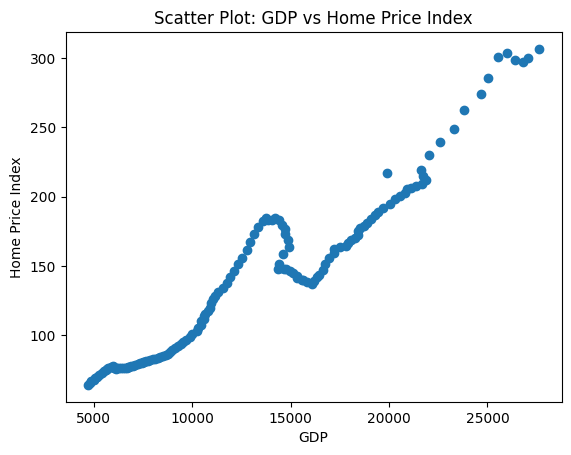

In [ ]:
# Reset the index of the pivot table
pivot_table.reset_index(inplace=True)

# Create a scatter plot
plt.scatter(pivot_table['gdp'], pivot_table['home-price-index'])

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Scatter Plot: GDP vs Home Price Index')

# Show the plot
plt.show()

a **Trendline** has been added to help observe the overall trend in the data. This trendline aids in identifying patterns and understanding the general direction of the relationship between home prices and GDP.

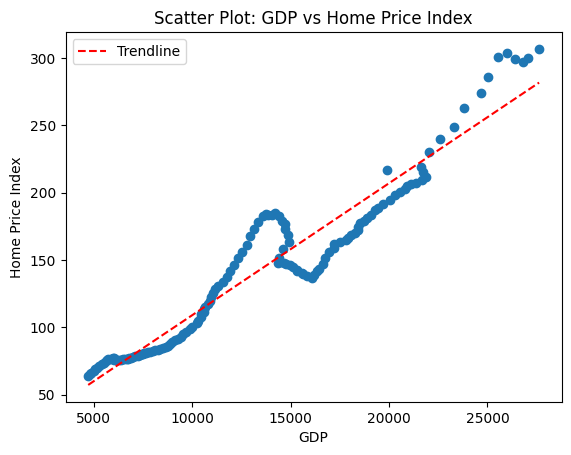

In [ ]:
# Reset the index of the pivot table
pivot_table.reset_index(inplace=True)

# Drop rows with NaN values
pivot_table.dropna(subset=['gdp', 'home-price-index'], inplace=True)

# Create a scatter plot
plt.scatter(pivot_table['gdp'], pivot_table['home-price-index'])

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Scatter Plot: GDP vs Home Price Index')

# Add a trendline
z = np.polyfit(pivot_table['gdp'], pivot_table['home-price-index'], 1)
p = np.poly1d(z)
plt.plot(pivot_table['gdp'], p(pivot_table['gdp']), "r--", label="Trendline")

# Show the legend
plt.legend()

# Show the plot
plt.show()


# **Last 20 Years:**
Considering the most recent 20 years of data from our dataset, crafted a **Scatter Plot** to specifically highlight the relationship between home prices and GDP during this period. This focused visualization allows us to zoom in on recent trends.

a **Trendline** in the plot. This trendline provides insights into the overall trend in the data, offering a clearer picture of the relationship between home prices and GDP over the past two decades

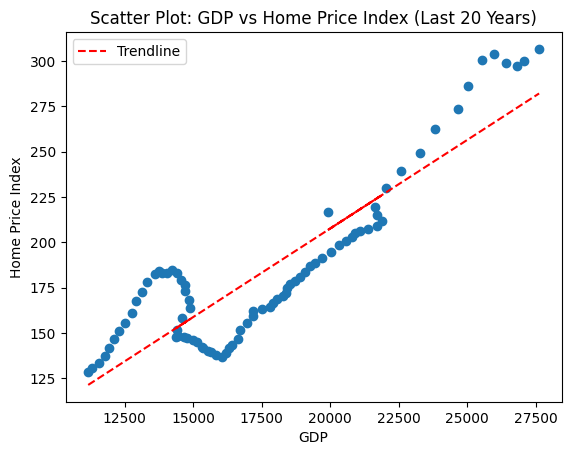

In [ ]:
# Reset the index of the pivot table
pivot_table.reset_index(inplace=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Create a scatter plot for the last 20 years
plt.scatter(last_20_years_data['gdp'], last_20_years_data['home-price-index'])

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Scatter Plot: GDP vs Home Price Index (Last 20 Years)')

# Add a trendline
z = np.polyfit(last_20_years_data['gdp'], last_20_years_data['home-price-index'], 1)
p = np.poly1d(z)
plt.plot(last_20_years_data['gdp'], p(last_20_years_data['gdp']), "r--", label="Trendline")

# Show the legend
plt.legend()

# Show the plot
plt.show()


**Plot Running Average and Running Sum:**

implemented Running Average and Running Sum plots on the graph. These additional visualizations provide a smoother view of trends over time. Running Average helps identify general patterns, while Running Sum offers insights into the cumulative impact, contributing to a more comprehensive understanding of the data trends.

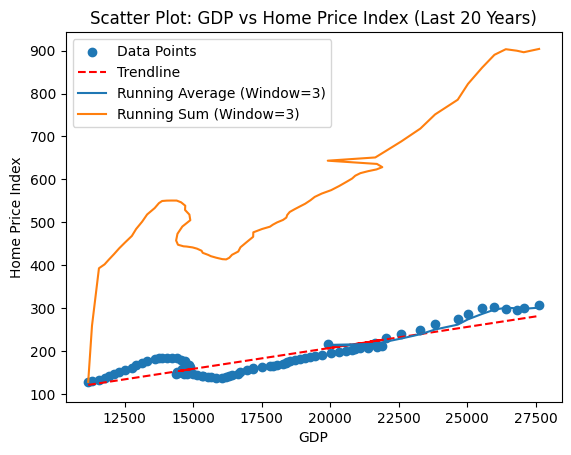

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Create a scatter plot for the last 20 years
plt.scatter(last_20_years_data['gdp'], last_20_years_data['home-price-index'], label='Data Points')

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Scatter Plot: GDP vs Home Price Index (Last 20 Years)')

# Add a trendline
z = np.polyfit(last_20_years_data['gdp'], last_20_years_data['home-price-index'], 1)
p = np.poly1d(z)
plt.plot(last_20_years_data['gdp'], p(last_20_years_data['gdp']), "r--", label="Trendline")

# Add running average
rolling_average = last_20_years_data['home-price-index'].rolling(window=3, min_periods=1).mean()
plt.plot(last_20_years_data['gdp'], rolling_average, label='Running Average (Window=3)')

# Add running sum
rolling_sum = last_20_years_data['home-price-index'].rolling(window=3, min_periods=1).sum()
plt.plot(last_20_years_data['gdp'], rolling_sum, label='Running Sum (Window=3)')

# Show the legend
plt.legend()

# Show the plot
plt.show()


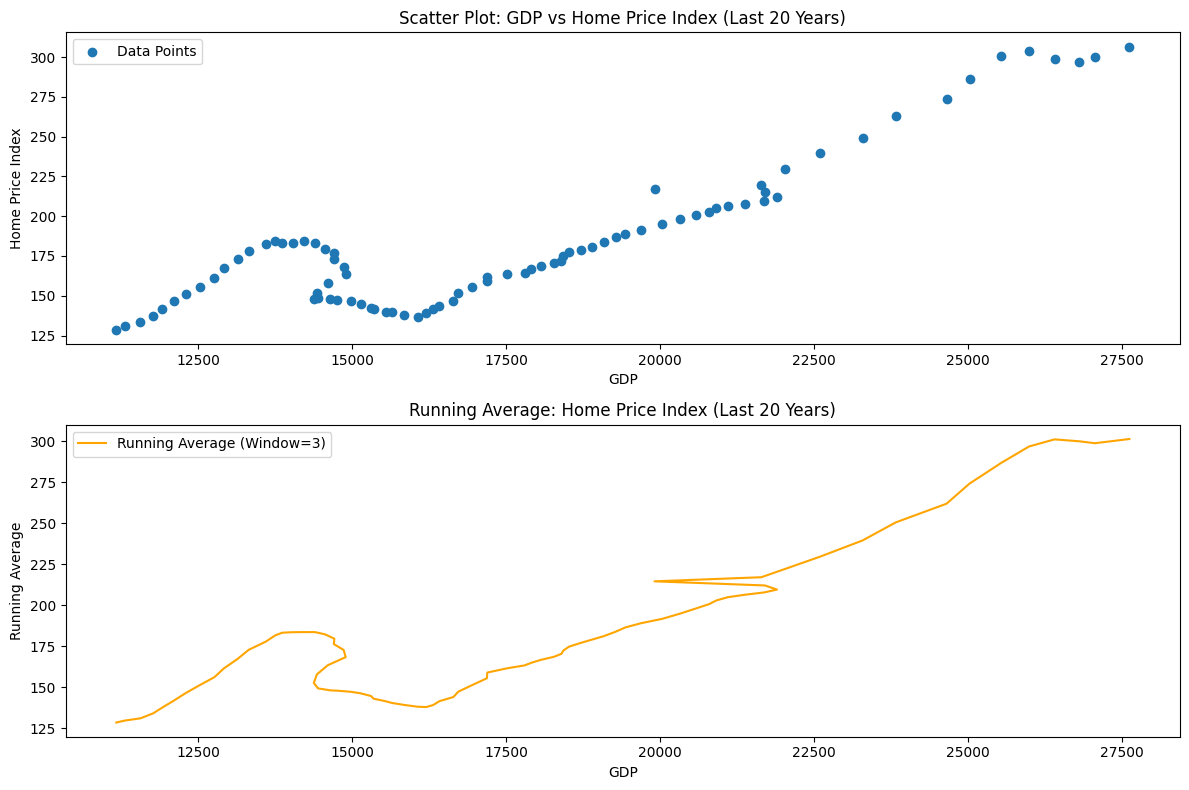

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Create a scatter plot for the last 20 years
plt.figure(figsize=(12, 8))

# Subplot for Data Points
plt.subplot(2, 1, 1)
plt.scatter(last_20_years_data['gdp'], last_20_years_data['home-price-index'], label='Data Points')
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Scatter Plot: GDP vs Home Price Index (Last 20 Years)')
plt.legend()

# Subplot for Running Average
plt.subplot(2, 1, 2)
rolling_average = last_20_years_data['home-price-index'].rolling(window=3, min_periods=1).mean()
plt.plot(last_20_years_data['gdp'], rolling_average, label='Running Average (Window=3)', color='orange')
plt.xlabel('GDP')
plt.ylabel('Running Average')
plt.title('Running Average: Home Price Index (Last 20 Years)')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


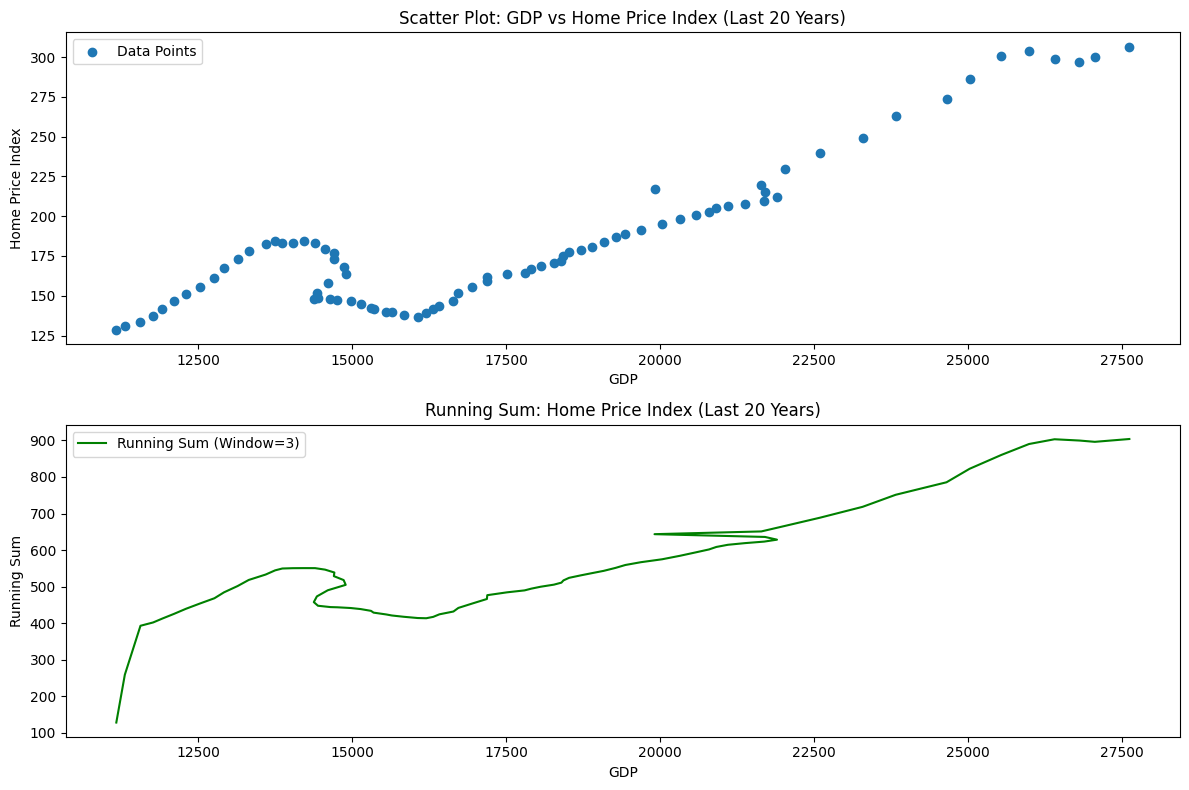

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Create a scatter plot for the last 20 years
plt.figure(figsize=(12, 8))

# Subplot for Data Points
plt.subplot(2, 1, 1)
plt.scatter(last_20_years_data['gdp'], last_20_years_data['home-price-index'], label='Data Points')
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Scatter Plot: GDP vs Home Price Index (Last 20 Years)')
plt.legend()

# Subplot for Running Sum
plt.subplot(2, 1, 2)
rolling_sum = last_20_years_data['home-price-index'].rolling(window=3, min_periods=1).sum()
plt.plot(last_20_years_data['gdp'], rolling_sum, label='Running Sum (Window=3)', color='green')
plt.xlabel('GDP')
plt.ylabel('Running Sum')
plt.title('Running Sum: Home Price Index (Last 20 Years)')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# **Analyze**

**Correlation Analysis:**

*   Calculate the correlation coefficient between GDP and home prices.
*   Utilize the corr() function in pandas.

In [ ]:
# Calculate correlation coefficient
correlation_coefficient = last_20_years_data['gdp'].corr(last_20_years_data['home-price-index'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: 0.8873552664483227


Positive Correlation (0 to 1): A positive correlation indicates that as one variable increases, the other variable tends to increase as well. The closer the correlation coefficient is to 1, the stronger the positive correlation.


**Statistical Analysis:**

Apply Ordinary Least Squares (OLS) regression model for a deeper statistical understanding.

                            OLS Regression Results                            
Dep. Variable:       home-price-index   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     300.0
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           5.80e-29
Time:                        06:33:01   Log-Likelihood:                -371.01
No. Observations:                  83   AIC:                             746.0
Df Residuals:                      81   BIC:                             750.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2850     10.208      1.203      0.2

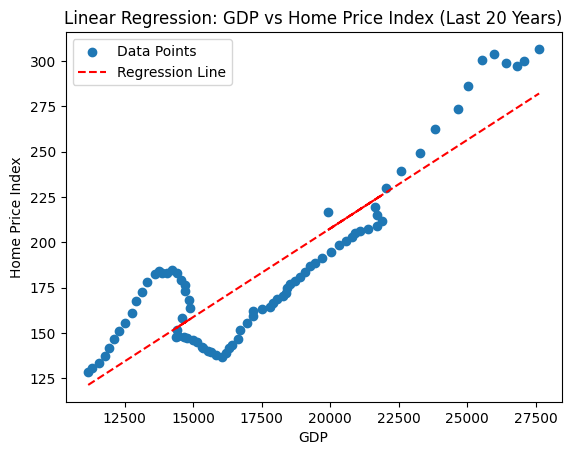

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Perform linear regression
X = sm.add_constant(last_20_years_data['gdp'])  # Add a constant term to the predictor
y = last_20_years_data['home-price-index']

model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) regression model
predictions = model.predict(X)  # Get the predicted values

# Print the regression summary
print(model.summary())

# Create a scatter plot with the regression line
plt.scatter(last_20_years_data['gdp'], last_20_years_data['home-price-index'], label='Data Points')
plt.plot(last_20_years_data['gdp'], predictions, "r--", label="Regression Line")

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Linear Regression: GDP vs Home Price Index (Last 20 Years)')

# Show the legend
plt.legend()

print("--------------------------------------------")
# Show the plot
plt.show()



Interpretation:
The coefficient for 'gdp' is 0.0098, and its associated P-value is very low (0.000), suggesting that the relationship between 'gdp' and 'home-price-index' is statistically significant.

The R-squared value of 0.787 indicates that the model explains a substantial proportion of the variance in 'home-price-index.'

**Residual Analysis:**

Analyze residuals from linear regression to identify patterns or trends not captured by the model.

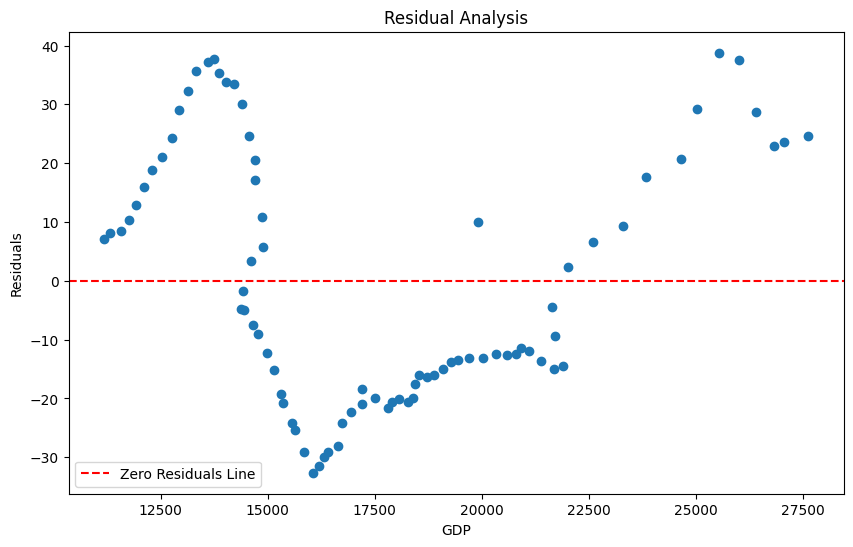

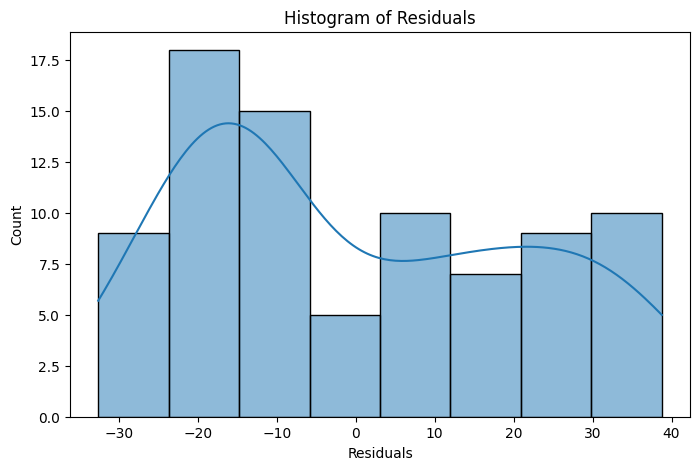

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Perform linear regression
X = sm.add_constant(last_20_years_data['gdp'])
y = last_20_years_data['home-price-index']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Residual analysis
residuals = y - predictions

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(last_20_years_data['gdp'], residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Analysis')
plt.xlabel('GDP')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

calculate the residuals by subtracting the predicted values from the actual values (residuals = y - predictions).
We create a scatter plot of residuals against the predictor variable ('gdp'). This plot helps identify patterns or trends in the residuals.
We include a horizontal line at y=0 in the scatter plot as a reference for zero residuals.
We also create a histogram of the residuals to examine their distribution.
In the scatter plot, you ideally want to see a random distribution of residuals around the zero line without any clear patterns or trends. If there are patterns (e.g., curvature, increasing or decreasing spread), it may indicate that the linear model is not capturing all the information in the data, and you may need to consider a more complex model..

**Outlier Detection:**


*   Identify outliers in the scatter plot.
*   Understand their potential impact on statistical analyses.

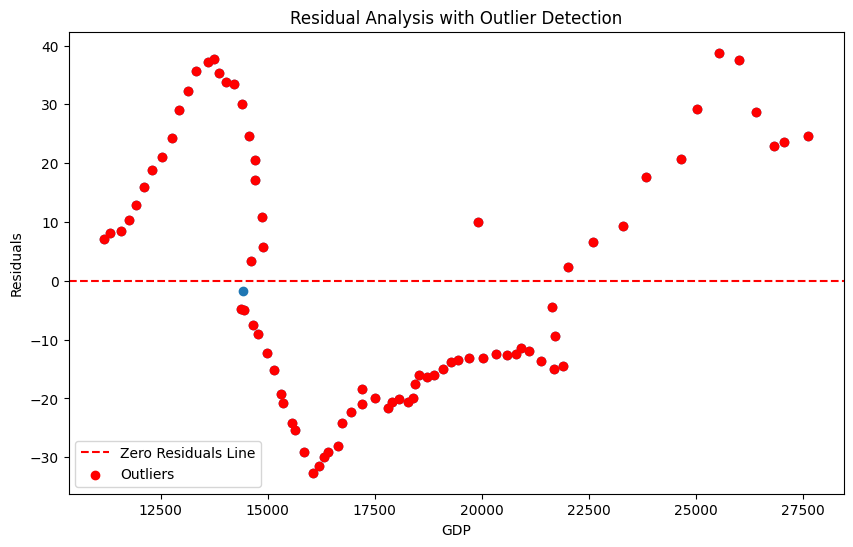

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Perform linear regression
X = sm.add_constant(last_20_years_data['gdp'])
y = last_20_years_data['home-price-index']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Residual analysis
residuals = y - predictions

# Plotting residuals against GDP to identify outliers
plt.figure(figsize=(10, 6))
plt.scatter(last_20_years_data['gdp'], residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Analysis with Outlier Detection')
plt.xlabel('GDP')
plt.ylabel('Residuals')
plt.legend()

# Highlighting potential outliers
outlier_threshold = 2  # Adjust this threshold based on your data and analysis
outliers = np.abs(residuals) > outlier_threshold
plt.scatter(last_20_years_data.loc[outliers, 'gdp'], residuals[outliers], color='red', label='Outliers')
plt.legend()

plt.show()


**Evaluate Model Performance:**

*   Assess the performance of regression models or trendlines.
*   Consider metrics like R-squared, mean squared error, or other relevant metrics.

R-squared: 0.7874
Mean Squared Error: 446.8433


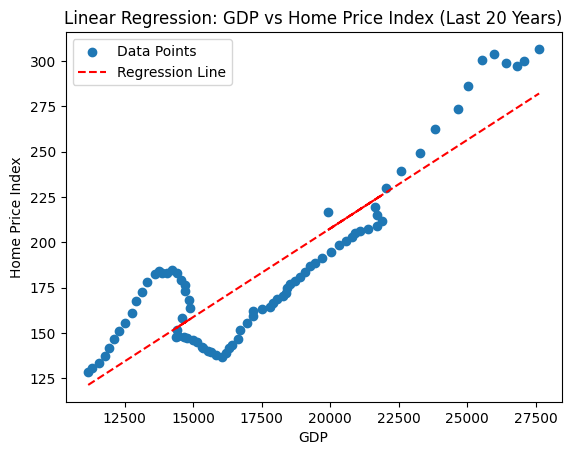

In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Perform linear regression
X = sm.add_constant(last_20_years_data['gdp'])
y = last_20_years_data['home-price-index']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Evaluate model performance
r_squared = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

# Print evaluation metrics
print(f'R-squared: {r_squared:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Create a scatter plot with the regression line
plt.scatter(last_20_years_data['gdp'], last_20_years_data['home-price-index'], label='Data Points')
plt.plot(last_20_years_data['gdp'], predictions, "r--", label="Regression Line")

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Home Price Index')
plt.title('Linear Regression: GDP vs Home Price Index (Last 20 Years)')

# Show the legend
plt.legend()

# Show the plot
plt.show()


R-squared (0.7874):

R-squared, also known as the coefficient of determination, is a measure of how well the independent variable(s) (in this case, 'gdp') explain the variation in the dependent variable ('home-price-index').
The R-squared value ranges from 0 to 1. A value of 1 indicates that the model explains all the variability in the dependent variable, while a value of 0 indicates that the model does not explain any variability.
In your case, an R-squared value of 0.7874 means that approximately 78.74% of the variance in 'home-price-index' is explained by the linear regression model. This is a relatively high R-squared value, suggesting that a substantial portion of the variability in home prices is captured by the GDP variable.

Mean Squared Error (MSE: 446.8433):

MSE is a measure of the average squared difference between the actual and predicted values. It provides a quantitative assessment of how close the predicted values are to the actual values.
A lower MSE indicates better model performance, as it means that, on average, the predictions are closer to the true values.
In your case, a MSE of 446.8433 indicates the average squared difference between the predicted and actual 'home-price-index' values. Interpretation of the specific magnitude of the MSE depends on the scale of your dependent variable.
In summary, a high R-squared value suggests that the model is explaining a significant portion of the variability in home prices based on GDP, and a relatively low MSE indicates that, on average, the model's predictions are close to the true values. These metrics collectively suggest that your linear regression model is performing reasonably well, but it's important to consider the context of your data and the specific goals of your analysis.

# **Next 10 Years Prediction:**


*   Use the trained model to make predictions for home prices over the next 10 years.
*   Consider the impact of expected changes in GDP on future home prices.



In [ ]:
# Reset the index of the pivot table with drop=True
pivot_table.reset_index(inplace=True, drop=True)

# Filter data for the last 20 years
last_20_years_data = pivot_table[pivot_table['year'] >= (pd.to_datetime('today').year - 20)]

# Perform linear regression
X = sm.add_constant(last_20_years_data['gdp'])
y = last_20_years_data['home-price-index']

# Train the model
your_model = sm.OLS(y, X).fit()

# Function to make future predictions
def make_future_predictions(gdp_values, model):
    # Create a DataFrame with the new GDP values
    future_data = pd.DataFrame({'gdp': gdp_values})

    # Add a constant term to the predictor variable
    future_data = sm.add_constant(future_data)

    # Make predictions using the model
    predictions = model.predict(future_data)

    return predictions

# Example: Predict home prices for the next 10 years
future_gdp_values = np.linspace(330, 430, 10)  # Replace with your desired range of future GDP values
future_predictions = make_future_predictions(future_gdp_values, your_model)

# Display the future predictions
future_predictions_df = pd.DataFrame({'Future_GDP': future_gdp_values, 'Predicted_Home_Price': future_predictions})
print(future_predictions_df)


   Future_GDP  Predicted_Home_Price
0  330.000000             15.508047
1  341.111111             15.616568
2  352.222222             15.725090
3  363.333333             15.833611
4  374.444444             15.942132
5  385.555556             16.050653
6  396.666667             16.159174
7  407.777778             16.267696
8  418.888889             16.376217
9  430.000000             16.484738


# **Find Predicition Model**

Import all models, metrics and other modules from Sci-kit Learn

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# X = last_20_years_data[['year','month','gdp']]
# Y = last_20_years_data[['home-price-index']]

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 0)

 **Logistic Regression**

In [ ]:


# Assuming last_20_years_data is your DataFrame
# Create bins for home price ranges
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500']

last_20_years_data['price_range'] = pd.cut(last_20_years_data['home-price-index'], bins=bins, labels=labels)

# Separate features and target variable
X = last_20_years_data[['year', 'month', 'gdp']]
Y = last_20_years_data['price_range']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

# Initialize and fit the Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

# Make predictions on the test set
Log_R_pred = model_LR.predict(X_test)

# Calculate the accuracy
accuracy_LR = metrics.accuracy_score(Log_R_pred, Y_test)
print('The accuracy of the Logistic Regression is', accuracy_LR)


The accuracy of the Logistic Regression is 0.84


<ipython-input-128-f94de7f6ed33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_years_data['price_range'] = pd.cut(last_20_years_data['home-price-index'], bins=bins, labels=labels)


 **Decision Tree**

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,Y_train)
DT_pred = model_DT.predict(X_test)
as_DT = metrics.accuracy_score(DT_pred ,Y_test)
print('The accuracy of the Decision Tree is',as_DT)

The accuracy of the Decision Tree is 0.88


**K-Nearest Neighbour (KNN)**

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,Y_train)
KNN_pred = model_KNN.predict(X_test)
as_KNN = metrics.accuracy_score(KNN_pred ,Y_test)
print('The accuracy of the KNN is',as_KNN)

The accuracy of the KNN is 0.88


**Random Forest**

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train,Y_train)
RF_pred = model_RF.predict(X_test)
as_RF = metrics.accuracy_score(RF_pred ,Y_test)
print('The accuracy of the RF is', as_RF)

The accuracy of the RF is 0.92


**We compare all this Models below:**

In [ ]:
model_score = { 'Logistic Regression' : accuracy_LR , 'Random Forest' : as_RF , 'KNN' : as_KNN ,'Decision Tree' : as_DT }
model_score

{'Logistic Regression': 0.84,
 'Random Forest': 0.92,
 'KNN': 0.88,
 'Decision Tree': 0.88}

In [ ]:
models = pd.DataFrame(list(model_score.items()) , columns = ['Model' , 'Score'])
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.92
2,KNN,0.88
3,Decision Tree,0.88
0,Logistic Regression,0.84


# **Result**

We can see that Random Forest is giving us the maximum accuracy score (0.92). \ Hence we will use Random Forest as our prediction model.